In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("CH06PR09.txt", sep='\s+', header=None,names=['Y','X1','X2','X3'])
df.head()

,Y,X1,X2,X3
0,4264,305657,7.17,0
1,4496,328476,6.20,0
2,4317,317164,4.61,0
3,4292,366745,7.02,0
4,4945,265518,8.61,1


In [4]:
Y = df['Y']
X1= df['X1']
X2=df['X2']
X3 = df['X3']
p = 3
n = len(df['X1'])
X = df.iloc[:,0:3]
X = sm.add_constant(X)
X.head()

,const,Y,X1,X2
0,1.0,4264,305657,7.17
1,1.0,4496,328476,6.20
2,1.0,4317,317164,4.61
3,1.0,4292,366745,7.02
4,1.0,4945,265518,8.61


### a. Obtain the studentized deleted residuals and identify any outlying Y observations.Use the Bonferroni outlier test procedure with α = .05. State the decision rule andconclusion.

In [5]:
from statsmodels.stats.outliers_influence import OLSInfluence

model = sm.OLS(Y, X, data=df)
results = model.fit()
results.summary()

C:\Users\tanvu\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.237e+27
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:08:29   Log-Likelihood:                 1189.7
No. Observations:                  52   AIC:                            -2371.
Df Residuals:                      48   BIC:                            -2364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.001e-11    7.8e-11      0.385      0.702   -1.27e-10    1.87e-10
Y              1.0000   1.68e-14   5.95e+13      0.000       1.000       1.000
X1          8.587e-17   7.58e-17      1.133      0.263   -6.65e-17    2.38e-16
X2         -5.684e-14   4.68e-12     -0.012      0.990   -9.47e-12    9.35e-12
==============================================================================
Omnibus:                        6.938   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.901
Skew:                          -0.727   Prob(JB):                       0.0523
Kurtosis:                       3.781   Cond. No.                     5.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b. Obtain the diagonal element of the hat matrix. Identify any outlying X observations.

In [6]:
n = len(Y)
p = 4
H = (2*p)/n
print('H=',H)
a=[] # an empty list to hold the diagnonal element of hat matrix

H= 0.15384615384615385


In [7]:
test_class = OLSInfluence(results)
dir(test_class)
h= test_class.hat_matrix_diag
for i in h:
    a.append(i)
print(a)

[0.023627948749954664, 0.06581698044204376, 0.2190909510770392, 0.05568620805407412, 0.19040771389064842, 0.02571239859636014, 0.04273148544423813, 0.06970201492123515, 0.050397322115752874, 0.06524738265959201, 0.030128414134051422, 0.05079723138771958, 0.030513198362204383, 0.0888053037744854, 0.03629545235236804, 0.15883948720039648, 0.036952496384013295, 0.0563058200697957, 0.022696172797184888, 0.04465506431648719, 0.12791444652770317, 0.20705407902891587, 0.06565986820939906, 0.07536328585989693, 0.053139156411446925, 0.022387672338412615, 0.024692442125740878, 0.06421282800813026, 0.03556753013565092, 0.04216286898932853, 0.049432889365642024, 0.13670465276572885, 0.044531805316377265, 0.0317924526061687, 0.07436388856445164, 0.06912939062730597, 0.042061278111589065, 0.0423848043590183, 0.058041333439750514, 0.04623553468824109, 0.04197605844838402, 0.12038632113954592, 0.28743728656653234, 0.21468197468787295, 0.10669507531387443, 0.03620452894681517, 0.07847307681558227, 0.22

In [8]:
model123 = ols("Y ~ X1+X2+X3", data=df).fit()
print(model123.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.32e-12
Time:                        13:08:30   Log-Likelihood:                -329.88
No. Observations:                  52   AIC:                             667.8
Df Residuals:                      48   BIC:                             675.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4149.8872    195.565     21.220      0.0

### From the given calculation, we can see that case  3, 5, 16, 21, 22, 43, 44, 48  are two times higher than the mean leverage value. For that reason, we can conclude that they are outlying X observation

### c. Management wishes to predict the total labor hours required to handle the nextshipment containing X1 = 300,000 cases whose indirect costs of the total hours is X2 = 7.2 and X3 = 0 (no holiday in week). Construct a scatter plot of X2 against X1 and determinevisually whether this prediction involves an extrapolation beyond the range of the data.Also, use (10.29) to determine whether an extrapolation is involved. Do your conclusionsfrom the two methods agree?


In [9]:
matY = np.array(Y)
print('Y= ',matY,'\n')

Y=  [4264 4496 4317 4292 4945 4325 4110 4111 4161 4560 4401 4251 4222 4063
 4343 4833 4453 4195 4394 4099 4816 4867 4114 4314 4289 4269 4347 4178
 4333 4226 4121 3998 4475 4545 4016 4207 4148 4562 4146 4555 4365 4471
 5045 4469 4408 4219 4211 4993 4309 4499 4186 4342] 



In [10]:
col1 = np.array(X1)
col2 = np.array(X2)
col3 = np.array(X3)
matJ = np.ones((len(X1)))
matX = np.stack( (matJ,col1,col2,col3),axis = 1)

In [11]:
X_X = np.dot(matX.T,matX)
print("X'X= ",X_X,'\n')

X'X=  [[5.20000000e+01 1.57400420e+07 3.83270000e+02 6.00000000e+00]
 [1.57400420e+07 4.92022190e+12 1.16223168e+08 1.85768000e+06]
 [3.83270000e+02 1.16223168e+08 2.86418050e+03 4.58600000e+01]
 [6.00000000e+00 1.85768000e+06 4.58600000e+01 6.00000000e+00]] 



In [12]:
X_Y = np.dot(matX.T,matY)
print("X'Y= ",X_Y, '\n')

X'Y=  [2.26878000e+05 6.88201774e+10 1.67289060e+06 2.94990000e+04] 



In [13]:
Invert = np.linalg.pinv(X_X) 

In [14]:
b=Invert.dot(X_Y)

In [15]:
b_trans = np.transpose(b)
b_trans

array([ 4.14988719e+03,  7.87080400e-04, -1.31660173e+01,  6.23554480e+02])

In [16]:
# double check the results by OLS 
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(matX,matY)
print('Intercept:\n',regr.intercept_)
print('Coeficients:\n',regr.coef_ )

Intercept:
 4149.88721195732
Coeficients:
 [ 0.00000000e+00  7.87080382e-04 -1.31660192e+01  6.23554481e+02]


In [17]:
b0=4149.88721195732
b1=7.87080400e-04
b2=-1.31660173e+01
b3=6.23554480e+02

In [18]:
Y_pred = b0 + (b1*300000) + (b2*7.2) + (b3*0)
Y_pred

4291.21600739732

<AxesSubplot:xlabel='X1', ylabel='X2'>

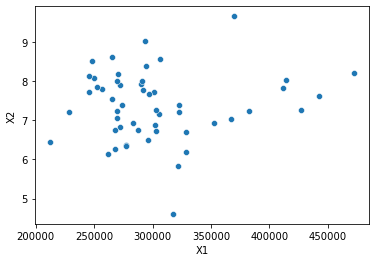

In [19]:
sns.scatterplot(x=X1, y= X2, data =df)

In [20]:
Xnew=[1,300000,7.2,0]
Xnew_trans = np.transpose(Xnew)
XpX= Xnew_trans.dot(Invert)
hnew= XpX.dot(Xnew)
print(hnew)

0.022217277704299404


### Conclusion: From the given methods, we can see that hnew is smaller than the leverage value (0.022 < 0.07), so we can conclude that extrapolaration is not involved

### d. Cases 16, 22, 43, and 48 appear to be outlying X observations, and cases 10, 32, 38, and 40 appear to be outlying Y observations. Obtain the DFFITS, DFBETAS, and Cook’s distance values for each of these cases to assess their influence. What do you conclude?

In [8]:
test_class = OLSInfluence(results)
dir(test_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_drop_vari',
 '_ols_xnoti',
 '_plot_index',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbeta',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_press',
 'resid_std',
 'resid_studentized',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'scale',
 'sigma2_not_obsi',
 'summary_

In [9]:
# test_class.resid_studentized
test_class.dffits

(0    -0.158509
 1    -0.235703
 2    -0.311177
 3    -0.182758
 4    -0.123641
 5    -0.092776
 6    -0.142499
 7    -0.088297
 8    -0.048632
 9    -0.078102
 10   -0.044294
 11   -0.062956
 12   -0.145482
 13   -0.101737
 14   -0.032664
 15   -0.285354
 16   -0.053220
 17   -0.598240
 18   -0.028027
 19   -0.039172
 20   -0.065028
 21   -0.275827
 22   -0.083900
 23   -0.056532
 24   -0.048501
 25   -0.095282
 26   -0.224941
 27   -0.056592
 28   -0.083475
 29   -0.073761
 30   -0.039120
 31   -0.226531
 32   -0.054097
 33   -0.079004
 34   -0.085087
 35   -0.056201
 36   -0.182098
 37   -0.089554
 38   -0.215439
 39   -0.056129
 40   -0.045159
 41   -0.095887
 42   -0.208103
 43   -0.007251
 44   -0.194306
 45   -0.054100
 46   -0.270195
 47   -0.102996
 48   -0.038171
 49   -0.030116
 50   -1.152309
 51   -0.046396
 dtype: float64,
 0.5547001962252291)

In [10]:
test_class.resid_studentized_external/test_class.resid_std

0    -3.533199e+10
1    -3.147915e+10
2    -2.277836e+10
3    -2.653560e+10
4    -9.708416e+09
5    -1.982410e+10
6    -2.361920e+10
7    -1.145904e+10
8    -7.422420e+09
9    -1.047633e+10
10   -8.743479e+09
11   -9.570704e+09
12   -2.853592e+10
13   -1.169732e+10
14   -5.874506e+09
15   -2.453191e+10
16   -9.485921e+09
17   -8.638255e+10
18   -6.374164e+09
19   -6.351325e+09
20   -6.229706e+09
21   -2.076932e+10
22   -1.121857e+10
23   -7.055667e+09
24   -7.208915e+09
25   -2.181899e+10
26   -4.904706e+10
27   -7.651913e+09
28   -1.516547e+10
29   -1.230808e+10
30   -6.028683e+09
31   -2.099245e+10
32   -8.783448e+09
33   -1.518142e+10
34   -1.069076e+10
35   -7.323849e+09
36   -3.042225e+10
37   -1.490409e+10
38   -3.063958e+10
39   -8.943919e+09
40   -7.552079e+09
41   -9.468856e+09
42   -1.329949e+10
43   -5.361711e+08
44   -2.038170e+10
45   -9.741969e+09
46   -3.304795e+10
47   -7.399421e+09
48   -8.544137e+09
49   -5.362282e+09
50   -1.118708e+11
51   -1.017055e+10
dtype: float

In [14]:
test_class.dfbetas

array([[ 7.47862868e-01, -5.20615900e-01,  1.63494515e+00,
        -5.51936251e-02],
       [-5.52182231e-02, -5.57596954e-01,  1.79508814e+00,
        -5.22778721e-03],
       [-4.85822554e-02, -9.63652156e-02, -1.07240466e-01,
        -6.32434927e-03],
       [ 7.83439988e-01, -4.98093506e-01,  9.29395842e-01,
        -3.00099050e-02],
       [-1.40510675e-01, -5.75115069e-02, -1.47423274e-01,
        -4.06476067e-03],
       [ 3.53945973e-01, -2.77741456e-01,  1.58263396e+00,
         7.08862157e-03],
       [-1.61833814e-01, -3.08937212e-01,  1.10721013e+00,
         5.32224766e-02],
       [ 4.45769365e-01, -2.59457764e-01,  9.61336805e-01,
        -1.25469063e-02],
       [ 4.33136438e-01, -1.63646997e-02,  6.37403556e-02,
        -1.00239840e-02],
       [-2.53592761e-01, -1.12279756e-01,  4.04286016e-01,
         4.12653030e-03],
       [-1.99011186e-01, -1.43898343e-01,  2.55835960e-01,
         7.14673451e-03],
       [-1.40314801e-01, -7.56412707e-02, -1.42694444e-01,
      

In [15]:
test_class.dffits

(0    -0.158509
 1    -0.235703
 2    -0.311177
 3    -0.182758
 4    -0.123641
 5    -0.092776
 6    -0.142499
 7    -0.088297
 8    -0.048632
 9    -0.078102
 10   -0.044294
 11   -0.062956
 12   -0.145482
 13   -0.101737
 14   -0.032664
 15   -0.285354
 16   -0.053220
 17   -0.598240
 18   -0.028027
 19   -0.039172
 20   -0.065028
 21   -0.275827
 22   -0.083900
 23   -0.056532
 24   -0.048501
 25   -0.095282
 26   -0.224941
 27   -0.056592
 28   -0.083475
 29   -0.073761
 30   -0.039120
 31   -0.226531
 32   -0.054097
 33   -0.079004
 34   -0.085087
 35   -0.056201
 36   -0.182098
 37   -0.089554
 38   -0.215439
 39   -0.056129
 40   -0.045159
 41   -0.095887
 42   -0.208103
 43   -0.007251
 44   -0.194306
 45   -0.054100
 46   -0.270195
 47   -0.102996
 48   -0.038171
 49   -0.030116
 50   -1.152309
 51   -0.046396
 dtype: float64,
 0.5547001962252291)

### Conclusion: Based on DIFFTS case 32 and 43 are influential values, and based on DIFBETA, 10,32,43,51,16 are influential values

### e.Calculate Cook’s distance Di for each case and prepare an index plot. Are any casesinfluential according to this measure?

In [25]:
X_trans = np.transpose(X)
X_transX = X_trans.dot(X)
X_transY = X_trans.dot(Y)
Invert = np.linalg.pinv(X_transX)
b = Invert.dot(X_transY)
Y_hat = X.dot(b)
J = np.ones((len(X1), len(X1)))
b_trans = np.transpose(b)
resid = Y - Y_hat
Y_trans = np.transpose(Y)
Y_transY = Y_trans.dot(Y)
Y_transJ = Y_trans.dot(J)
YJY = Y_transJ.dot(Y)
b_transXY = b_trans.dot(X_transY)
SSTO = Y_transY - ((1/len(X1))*YJY)
SSE = Y_transY - b_transXY
MSE = SSE / (len(X1)-4)
print(MSE,SSE)
print(resid.head())

-2.9802322387695312e-08 -1.430511474609375e-06
0   -1.277082e-06
1   -1.450126e-07
2   -3.667188e-06
3   -9.782607e-07
4    6.574794e-06
dtype: float64


In [31]:
# Cook's distance
Di = ((resid**2)/(4*MSE))*(h/((1-h)**2))
Cook=[]
for i in Di:
    Cook.append(Di)
print(Cook)

[0    -3.390959e-07
1    -1.330378e-08
2    -4.053030e-05
3    -5.013189e-07
4    -1.053431e-04
5    -2.516802e-07
6    -2.996707e-06
7    -1.006922e-05
8    -4.347366e-06
9    -1.382969e-07
10   -1.852310e-08
11   -2.824274e-06
12   -1.099159e-06
13   -2.181243e-06
14   -3.202718e-07
15   -1.213014e-05
16   -3.007410e-10
17   -1.775393e-07
18   -5.938170e-08
19   -2.121507e-06
20   -2.594912e-05
21   -2.825170e-05
22   -5.246077e-06
23   -1.932239e-07
24   -1.909866e-08
25   -2.544717e-07
26   -2.845396e-08
27   -8.839015e-07
28   -4.963330e-07
29   -4.592733e-07
30   -1.661992e-06
31   -4.430546e-06
32   -9.490318e-07
33   -5.944246e-07
34   -6.527432e-06
35   -6.581704e-06
36   -3.206393e-06
37   -2.053006e-06
38   -9.760574e-07
39   -1.275643e-06
40   -7.372569e-08
41   -1.750895e-06
42   -3.891070e-04
43   -1.654715e-05
44   -2.219265e-06
45   -1.612810e-06
46   -1.604143e-06
47   -1.345457e-04
48   -6.224730e-08
49   -1.081417e-06
50   -1.072058e-06
51   -1.680174e-09
dtype: floa

### According to Cook's distance, 32 and 43 are influential values